# IPCV: Filter - Übung 1

Übung von: Remo Schwarzentruber

## Imports & Settings

In [13]:
from matplotlib.pyplot import *
import numpy as np
import cv2
rcParams['figure.dpi'] = 200

# Aufgabe 1: Faltung

Ein eindimensionales Bild enthalte die folgenden Graustufenwerte f = {0, 0, 0, 1, 1, 1, 1, 0, 0, 0}. Es soll mit der Maske w = {1, 2, 2, 2, 1} gefaltet werden.
Berechnen Sie die Faltung ( f ⋆ w) von Hand und zur Kontrolle mit Hilfe geeigneter Python-Befehle. Auf was ist bei der Berechnung zu achten?

In [14]:
f = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])
w = np.array([ 1, 2, 2, 2, 1])
print(np.convolve(f, w))

[0 0 0 1 3 5 7 7 5 3 1 0 0 0]


### Aufgabe 1: von Hand gelöst:

![alt text](img/Aufgabe_01_von_Hand.jpeg "Aufgabe 1 von Hand gelöst")

# Aufgabe 2: Faltung und Barker-Codes

Falten Sie den Barker-Code der Länge $4$ ($\left\{x_1[n]\right\}=\left\{1,1,-1,1\right\}$)
mit der Folge $\left\{x_2[n]\right\}=\left\{1,-1,1,1\right\}$. Wo hat die Faltung ihr
Maximum? Man kann zeigen: faltet man eine Barker-Codefolge mit ihrer zeitumgekehrten
Folge, entsteht ein sehr eindeutiges Maximum bei der Länge der Barker-Codefolge.

Man erhält: $\left\{y[n]\right\}=\left\{1,0,-1,4,-1,0,1\right\}$

Mit Hilfe von Python kann man dieses Resultat wie folgt erhalten:

In [15]:
b = np.array([1, 1, -1, 1])
binv = b[::-1]
print(b)
print(binv)
y = np.convolve(b, binv)
print(y)

[ 1  1 -1  1]
[ 1 -1  1  1]
[ 1  0 -1  4 -1  0  1]


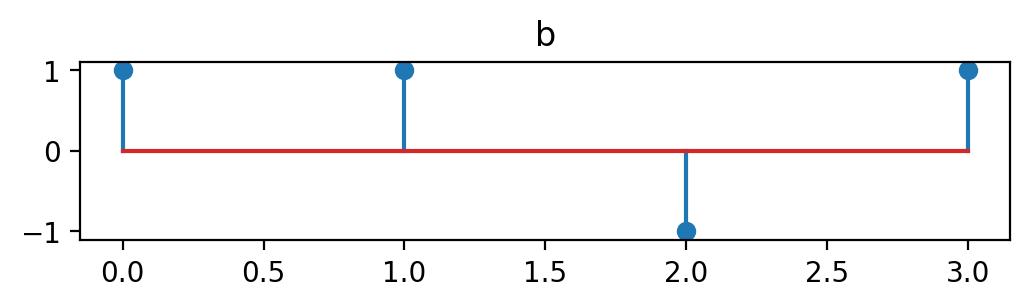

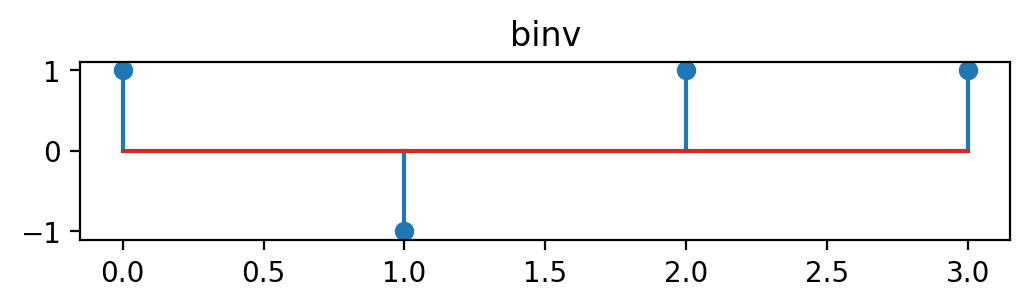

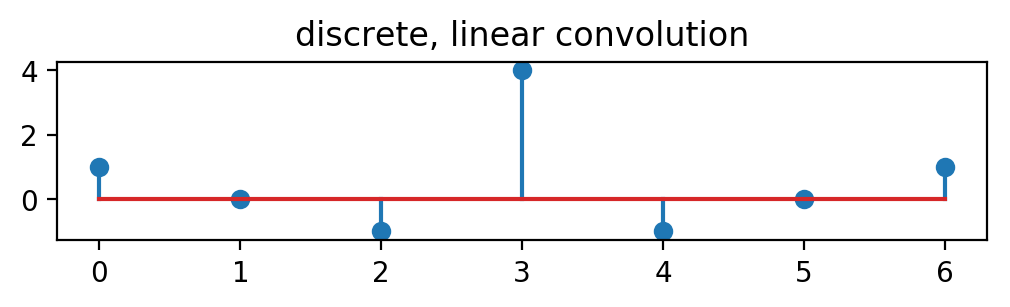

In [16]:
figure()
subplot(3, 1, 1)
title("b")

stem(b)
figure()
subplot(3, 1, 2)
title("binv")
stem(binv)

figure()
subplot(3, 1, 3)
title("discrete, linear convolution")
stem(y)
show()

# Aufgabe 3: Korrelation

Berechnen Sie von Hand und mit Python (oder MATLAB) die Korrelation $corr$($f$,$g$) $k$ für $f$ = {1, 1, 0, 0, 1, 1, 0, 0} und $g$ = {0, 1, 1, 0} und zwar mit Nullpadding.

## Aufgabe 3: von Hand

![alt text](img/Aufgabe_02_von_Hand.jpeg "Aufgabe 2 von Hand gelöst")

## Aufgabe 3: mit Python

In [17]:
f = np.array([1, 1, 0, 0, 1, 1, 0, 0])
g = np.array([0, 1, 1, 0])
result = np.correlate(f, g, "full")
print(result)

[0 1 2 1 0 1 2 1 0 0 0]


# Aufgabe 4: Kantendetektion / Hochpassﬁlter

Verwenden Sie die verschiedenen Filter zur Detektion der Kanten im Bild `DIP+MatLab-Gonzalesetal-F04.09a.tif`
Kommentieren Sie die Resultate und vergleichen Sie mit dem Sitznachbar.

### Laplace Filter

Zuerst verwenden wir manuell erstellte Laplace-Filter um das Bild zu filtern und die Kanten zu detektieren. Die Filter stammen aus dem Folien oder Wikipedia. Link: [Laplace operator](https://de.wikipedia.org/wiki/https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

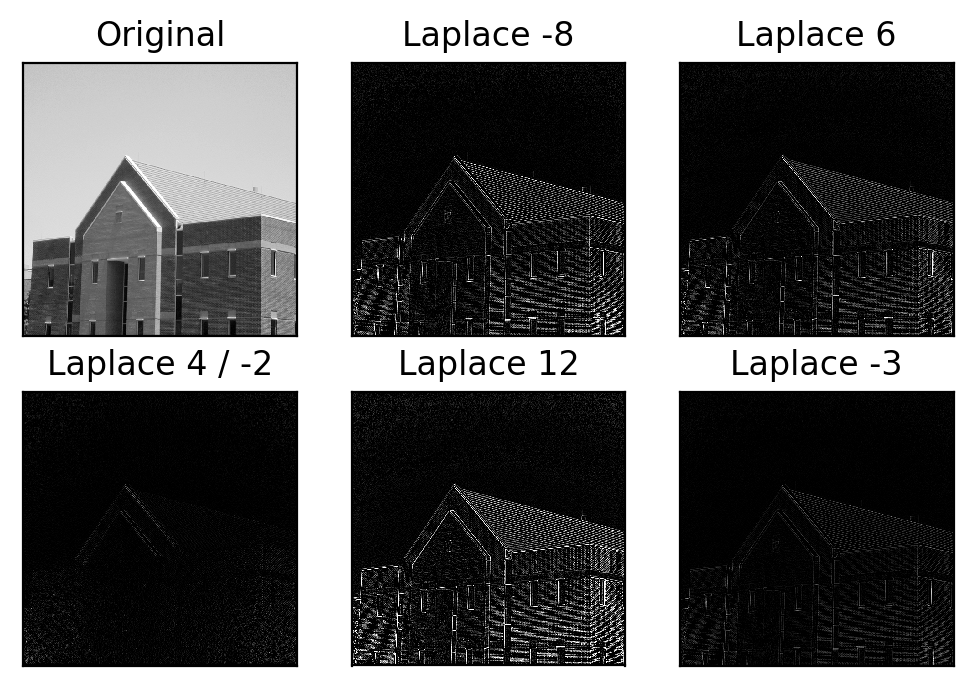

In [18]:
img = cv2.imread('../data/DIP+MatLab-Gonzalesetal-F04.09a.tiff')

laplace_minus_8 = np.array([
                                [ 1,  1, 1],
                                [ 1, -8, 1],
                                [ 1,  1, 1]
                            ])
laplace_6 = np.array([
                                [0, -1, -1],
                                [-1, 6, -1],
                                [-1, -1, 0]
                    ])
laplace_4 = np.array([
                                [ 0, -1,  0],
                                [-1,  4, -1],
                                [ 0, -1,  0]
                    ])
laplace_4_minus_2 = np.array([
                                [ 1, -2,  1],
                                [-2,  4, -2],
                                [ 1, -2,  1]
                    ])
laplace_12 = np.array([
                                [-1, -2, -1],
                                [-2, 12, -2],
                                [-1, -2, -1]
                    ])
laplace_minus_3 = np.array([
                                [0.25, 0.5, 0.25],
                                [ 0.5,  -3, 0.5 ],
                                [0.25, 0.5, 0.25]
                    ])

subplot(2, 3, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 3, 2), imshow(cv2.filter2D(img, -1, laplace_minus_8)), title("Laplace -8"), xticks([]), yticks([])
subplot(2, 3, 3), imshow(cv2.filter2D(img, -1, laplace_6)), title("Laplace 6"), xticks([]), yticks([])
subplot(2, 3, 4), imshow(cv2.filter2D(img, -1, laplace_4_minus_2)), title("Laplace 4 / -2"), xticks([]), yticks([])
subplot(2, 3, 5), imshow(cv2.filter2D(img, -1, laplace_12)), title("Laplace 12"), xticks([]), yticks([])
subplot(2, 3, 6), imshow(cv2.filter2D(img, -1, laplace_minus_3)), title("Laplace -3"), xticks([]), yticks([])
show()

### Sobel-Operator

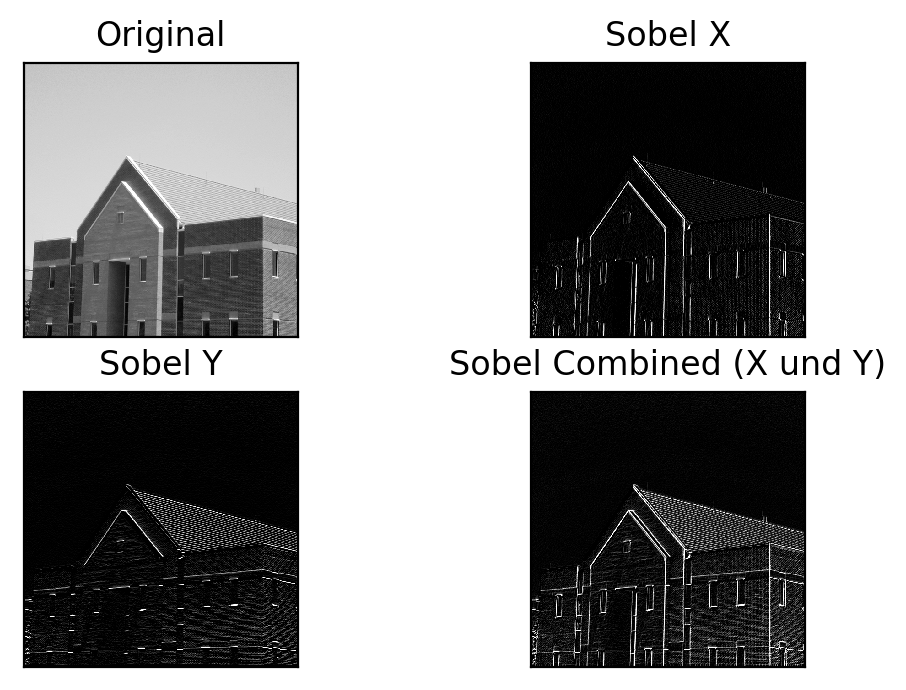

In [19]:
img = cv2.imread('../data/DIP+MatLab-Gonzalesetal-F04.09a.tiff')

# Je einen Kernel für Horizontale und Vertikale Kanten
# X => Horizontale Kanten
sobelKernelX = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

# Y => Vertikale Kanten
sobelKernelY = np.array([
    [-1, -2, -1], 
    [0, 0, 0],
    [1, 2, 1]
])

sobelX = cv2.filter2D(img, -1, sobelKernelX)
sobelY = cv2.filter2D(img, -1, sobelKernelY)

# Die beiden Bilder können kombiniert werden
sobelCombined = cv2.add(sobelX, sobelY)

subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(sobelX), title("Sobel X"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(sobelY), title("Sobel Y"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(sobelCombined), title("Sobel Combined (X und Y)"), xticks([]), yticks([])
show()

Mit OpenCV können die Filter direkt angewendet werden:

### Die Parameter:

Canny = https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de

Laplacian = https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6

Sobel = https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d

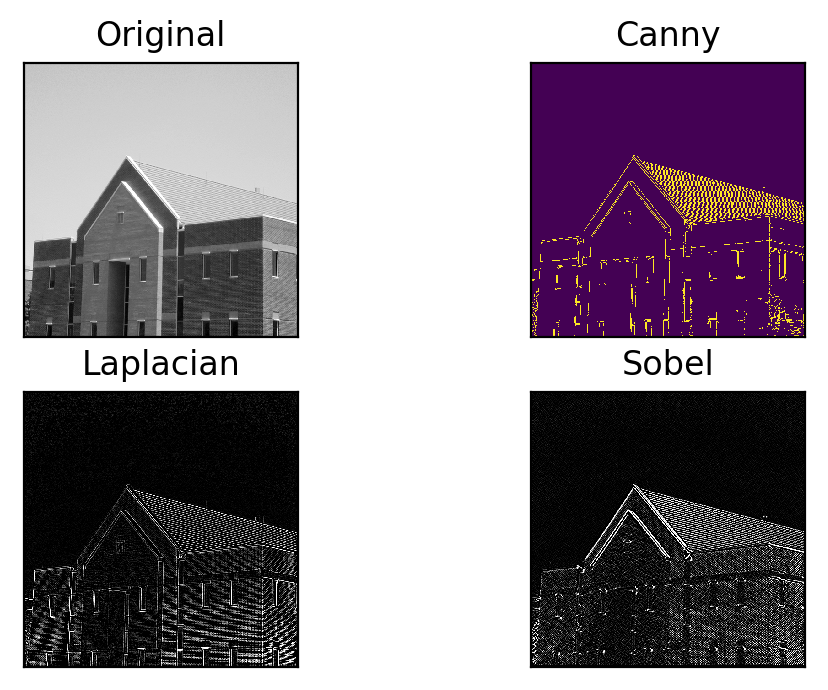

In [20]:
img = cv2.imread('../data/DIP+MatLab-Gonzalesetal-F04.09a.tiff')

edges1 = cv2.Canny(img, 100, 200)
edges2 = cv2.Laplacian(img, -1, ksize=3)
edges3 = cv2.Sobel(img, -1, 1, 1, ksize=5)

subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(edges1), title("Canny"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(edges2), title("Laplacian"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(edges3), title("Sobel"), xticks([]), yticks([])
show()

# Aufgabe 5: Laplacefilter

Wir verbessern nun ein Bild mit dem Laplace-Filter
\begin{align*}
  \Delta f(x,y) \equiv {\nabla}^2 f(x,y) &= \frac{\partial^2 f(x,y)}{\partial x^2}
    + \frac{\partial^2 f(x,y)}{\partial y^2}\nonumber
\end{align*}
wobei $\displaystyle \frac{\partial^2 f(x,y)}{\partial x^2}$
für das zweimalige (partielle) Ableiten von $f(x,y)$ nach $x$ steht.

Eine diskrete Approximation der zweiten Ableitung kann wie folgt
hergeleitet werden: Zuerst wird die erste Ableitung links (bei
$x-1/2$) und rechts (bei $x+1/2)$) des Punktes $(x,y)$ ausgerechnet
\begin{align*}
  \frac{\partial f(x-1/2,y)}{\partial x} &= f(x,y) - f(x-1,y)\\
  \frac{\partial f(x+1/2,y)}{\partial x} &= f(x+1,y) - f(x,y)
\end{align*}
Anschliessend wird die zweite Ableitung als nochmalige
Ableitung der ersten Ableitung berechnet
\begin{align*}
  \frac{\partial^2 f(x,y)}{\partial x^2} &=
    \frac{\partial f(x+1/2,y)}{\partial x}
    - \frac{\partial f(x-1/2,y)}{\partial x}\\
    &= f(x+1,y) - f(x,y) - \left(f(x,y) - f(x-1,y)\right)\\
    &= f(x+1,y) - 2 f(x,y) + f(x-1,y)
\end{align*}
Analog berechnet man die zweite partielle Ableitung
$\displaystyle \frac{\partial^2 f(x,y)}{\partial y^2}$.
Man hat also approximativ
\begin{align*}
  {\nabla}^2 f(x,y)
    &= \left[f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4 f(x,y)\right]
\end{align*}

Dem entspricht der folgende Filterkernel


In [21]:
w = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

Ein auch oft verwendete Filterkernel für den Laplacefilter ist:

In [22]:
w = [
    [1, 1, 1],
    [1, -6, 1],
    [1, 1, 1]
]

Oft sind auch die Vorzeichen in anderen Implementationen genau
umgekehrt: das soll aber nicht weiter stören --- es ist reine
Definitionsangelegenheit!

Die Bildverbesserung mit Hilfe eines Laplacefilters basiert auf der
Idee das Inputbild $f(x,y)$ folgendermassen zu ergänzen:
\begin{align*}
  g(x,y) &= f(x,y) + c\left[{\nabla}^2 f(x,y)\right]
\end{align*}
Zum ursprünglichen Bild wird ein Vielfaches (deshalb die Konstante
$c\in\mathbb{R}$) der Kanten/Ecken addiert was das Bild optisch
schärfer wirken lässt.

Wir wollen diese Behauptung mit Hilfe eines Beispiels überprüfen.
Dazu lesen wir das Bild des Mondes ein, spezifizieren den oben
als erstes gezeigten Laplacefilter und bearbeiten das Bild entsprechend:


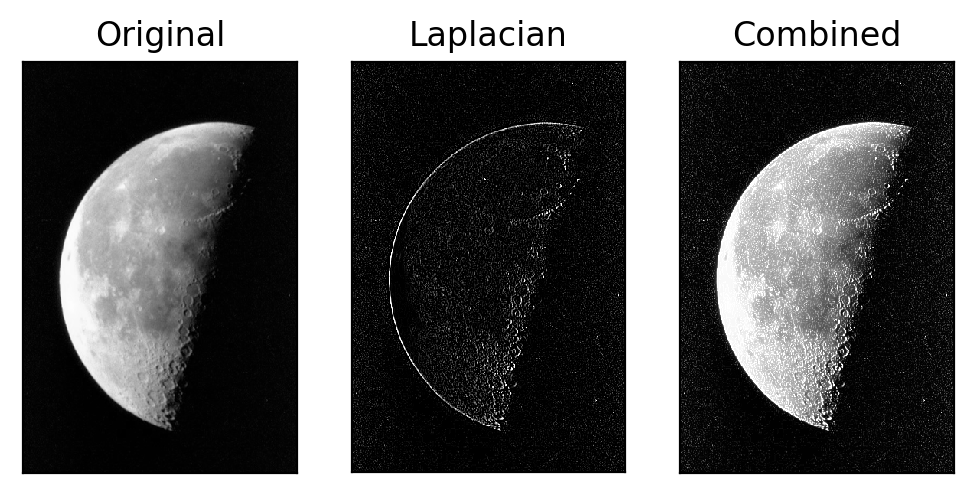

In [23]:
img = cv2.imread('../data/moon.tiff')

laplace_minus_8 = np.array([
                                [ 1,  1, 1],
                                [ 1, -8, 1],
                                [ 1,  1, 1]
                            ])
laplace_6 = np.array([
                                [0, -1, -1],
                                [-1, 6, -1],
                                [-1, -1, 0]
                    ])
laplace_4 = np.array([
                                [ 0, -1,  0],
                                [-1,  4, -1],
                                [ 0, -1,  0]
                    ])
laplace_4_minus_2 = np.array([
                                [ 1, -2,  1],
                                [-2,  4, -2],
                                [ 1, -2,  1]
                    ])
laplace_12 = np.array([
                                [-1, -2, -1],
                                [-2, 12, -2],
                                [-1, -2, -1]
                    ])
laplace_minus_3 = np.array([
                                [0.25, 0.5, 0.25],
                                [ 0.5,  -3, 0.5 ],
                                [0.25, 0.5, 0.25]
                    ])


filtered = cv2.filter2D(img, -1, laplace_12)
combined = cv2.add(img, filtered)

subplot(1, 3, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(1, 3, 2), imshow(filtered), title("Laplacian"), xticks([]), yticks([])
subplot(1, 3, 3), imshow(combined), title("Combined"), xticks([]), yticks([])
show()


# Aufgabe 6: Mask Median Filter

Beim **Mask Median Filter** wird der Median nicht über alle Pixel des Filterfensters genommen sondern lediglich über die markierten. Dies kann verwendet werden, um beispielsweise vertikale Kratzer zu entfernen. Dazu wird eine counterscratch-Maske verwendet, welche Pixel senkrecht zum Kratzer inkludiert wie die folgende Abbildung zeigt.

![MaskMedian](../data/MaskMedian.png)

Erzeugen Sie im Bild `DIP+MatLab-Gonzalesetal-F04.09a.tif` einen mehr oder weniger langen und vertikalen Kratzer von **1-2 Pixeln** Breite und entfernen Sie diesen mit Hilfe geeigneter MATLAB-Befehle. Schrei- ben Sie die Befehle auf und zeigen Sie das verkratzte Original sowie das verbesserte Bild.

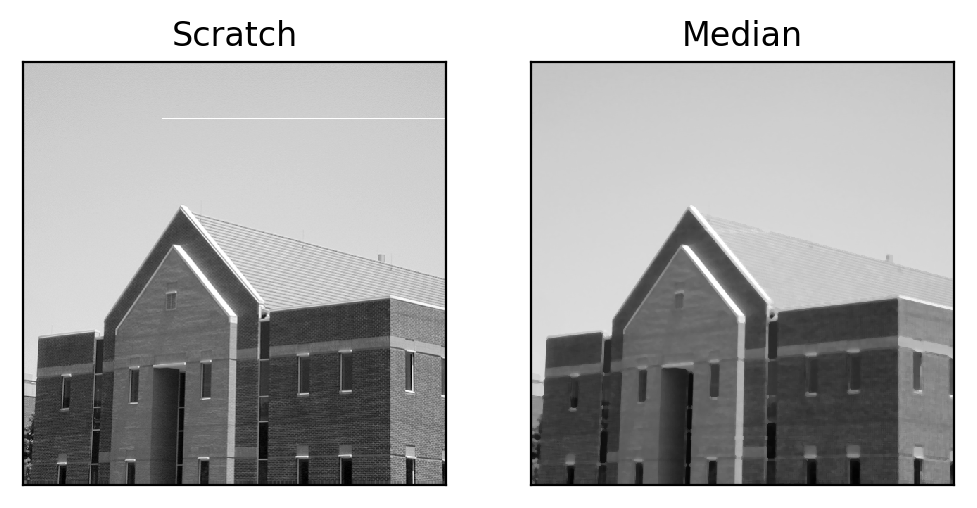

In [24]:
scratch = cv2.imread("../data/gonzalesscratch.tif")
blur = cv2.medianBlur(scratch, 5)

subplot(1, 2, 1), imshow(scratch), title("Scratch"), xticks([]), yticks([])
subplot(1, 2, 2), imshow(blur), title("Median"), xticks([]), yticks([])
show()